### Telecom Churn Case Study
### The main goal of the case study is to build ML models to predict churn. The predictive model should fill the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on your observations.

### Step 1: reading and understanding the data

In [1]:
# let us import the necessary libraries
import numpy as np
import pandas as pd

# to ignore warnings in seaborn etc
import warnings
warnings.filterwarnings('ignore')

# for making plots
import matplotlib.pyplot as plt
import seaborn as sns

# To display all the rows of pandas dataframe without skipping upto 1000 rows 
# while printing
pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', 1000)  # or 199

#### reading train and test data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#### understanding the data

In [3]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
train_data.shape, test_data.shape

((69999, 172), (30000, 171))

#### checking info of train and test data

In [6]:
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [7]:
test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

#### checking for null values

In [8]:
round((train_data.isnull().sum()/len(train_data.index))*100,2)

id                           0.00
circle_id                    0.00
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou

In [9]:
round((test_data.isnull().sum()/len(test_data.index))*100,2)

id                           0.00
circle_id                    0.00
loc_og_t2o_mou               1.05
std_og_t2o_mou               1.05
loc_ic_t2o_mou               1.05
last_date_of_month_6         0.00
last_date_of_month_7         0.67
last_date_of_month_8         1.22
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.90
onnet_mou_7                  3.91
onnet_mou_8                  5.58
offnet_mou_6                 3.90
offnet_mou_7                 3.91
offnet_mou_8                 5.58
roam_ic_mou_6                3.90
roam_ic_mou_7                3.91
roam_ic_mou_8                5.58
roam_og_mou_6                3.90
roam_og_mou_7                3.91
roam_og_mou_8                5.58
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.91
loc_og_t2t_mou_8             5.58
loc_og_t2m_mou_6             3.90
loc_og_t2m_mou_7             3.91
loc_og_t2m_mou_8             5.58
loc_og_t2f_mou

#### checking the columns in train and test data which have more than 30 percent entries as null

In [10]:
# for train data picking columns having more than 30 percent null values
train_rem_cols = train_data.isnull().sum()/len(train_data.index)

In [11]:
train_rem_cols[train_rem_cols > 0.3]

date_of_last_rech_data_6    0.749025
date_of_last_rech_data_7    0.744782
date_of_last_rech_data_8    0.736896
total_rech_data_6           0.749025
total_rech_data_7           0.744782
total_rech_data_8           0.736896
max_rech_data_6             0.749025
max_rech_data_7             0.744782
max_rech_data_8             0.736896
count_rech_2g_6             0.749025
count_rech_2g_7             0.744782
count_rech_2g_8             0.736896
count_rech_3g_6             0.749025
count_rech_3g_7             0.744782
count_rech_3g_8             0.736896
av_rech_amt_data_6          0.749025
av_rech_amt_data_7          0.744782
av_rech_amt_data_8          0.736896
arpu_3g_6                   0.749025
arpu_3g_7                   0.744782
arpu_3g_8                   0.736896
arpu_2g_6                   0.749025
arpu_2g_7                   0.744782
arpu_2g_8                   0.736896
night_pck_user_6            0.749025
night_pck_user_7            0.744782
night_pck_user_8            0.736896
f

In [12]:
# extracting these columns in a list for dropping
print(train_rem_cols[train_rem_cols > 0.3].index)
train_null_cols = list(train_rem_cols[train_rem_cols > 0.3].index)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


In [13]:
# checking for the columns in test data that have more than 30 percent null values
test_rem_cols = test_data.isnull().sum()/len(test_data.index)

In [14]:
test_rem_cols[test_rem_cols > 0.3]

date_of_last_rech_data_6    0.747167
date_of_last_rech_data_7    0.743133
date_of_last_rech_data_8    0.735933
total_rech_data_6           0.747167
total_rech_data_7           0.743133
total_rech_data_8           0.735933
max_rech_data_6             0.747167
max_rech_data_7             0.743133
max_rech_data_8             0.735933
count_rech_2g_6             0.747167
count_rech_2g_7             0.743133
count_rech_2g_8             0.735933
count_rech_3g_6             0.747167
count_rech_3g_7             0.743133
count_rech_3g_8             0.735933
av_rech_amt_data_6          0.747167
av_rech_amt_data_7          0.743133
av_rech_amt_data_8          0.735933
arpu_3g_6                   0.747167
arpu_3g_7                   0.743133
arpu_3g_8                   0.735933
arpu_2g_6                   0.747167
arpu_2g_7                   0.743133
arpu_2g_8                   0.735933
night_pck_user_6            0.747167
night_pck_user_7            0.743133
night_pck_user_8            0.735933
f

In [15]:
# extracting these columns in a list for dropping
print(test_rem_cols[test_rem_cols > 0.3].index)
test_null_cols = list(test_rem_cols[test_rem_cols > 0.3].index)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


In [16]:
# taking a union of the two lists so that we can drop these columns in both train and test data

rem_cols = list(set(train_null_cols + test_null_cols))
rem_cols

['date_of_last_rech_data_8',
 'count_rech_2g_6',
 'arpu_2g_8',
 'fb_user_8',
 'arpu_2g_7',
 'max_rech_data_7',
 'night_pck_user_8',
 'max_rech_data_6',
 'count_rech_3g_8',
 'fb_user_7',
 'max_rech_data_8',
 'night_pck_user_6',
 'count_rech_3g_6',
 'count_rech_2g_7',
 'night_pck_user_7',
 'count_rech_2g_8',
 'total_rech_data_7',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_7',
 'total_rech_data_6',
 'av_rech_amt_data_7',
 'arpu_3g_8',
 'av_rech_amt_data_6',
 'total_rech_data_8',
 'av_rech_amt_data_8',
 'fb_user_6',
 'date_of_last_rech_data_7']

### Step 2: data preparation

#### removing the columns that have more than 30 percent null values in both train and test data

In [17]:
train = train_data.drop(rem_cols, axis=1)
test = test_data.drop(rem_cols, axis=1)

In [18]:
train.shape, test.shape

((69999, 142), (30000, 141))

#### checking for duplicate values in columns

In [19]:
# checking for duplicate in train data
train.duplicated().sum()

0

In [20]:
# checking for duplicate in test data
test.duplicated().sum()

0

#### let us now check for the columns that have same values for the entire column

In [21]:
# for train data identifying columns with only one value
train_dup_cols = [i for i in train.columns if train[i].nunique()==1]
train_dup_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [22]:
# cross verifying for a single column in above list
train.circle_id.value_counts()

109    69999
Name: circle_id, dtype: int64

In [23]:
# for test data identifying columns with only one value
test_dup_cols = [i for i in test.columns if test[i].nunique()==1]
test_dup_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [24]:
# taking a union of train and test columns that have only one value so that we can drop them from train as well as test data
dup_cols = list(set(train_dup_cols+test_dup_cols))
dup_cols

['circle_id',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_6',
 'std_og_t2c_mou_6',
 'last_date_of_month_6',
 'std_og_t2o_mou',
 'std_og_t2c_mou_7',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_8',
 'loc_og_t2o_mou']

In [25]:
# dropping the columns
train = train.drop(dup_cols, axis=1)
test = test.drop(dup_cols, axis=1)

In [26]:
train.shape, test.shape

((69999, 129), (30000, 128))

#### missing values handling

In [27]:
# checking for the values that are missing in training data
(train.isnull().sum()/len(train.index))*100

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t

In [28]:
# extracting names of columns
null_cols = train.isnull().sum()/len(train.index)
train_null_cols = list(null_cols[null_cols>0].index)
train_null_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [29]:
# similarly extracting columns with missing values in test data
# extracting names of columns
null_cols = test.isnull().sum()/len(test.index)
test_null_cols = list(null_cols[null_cols>0].index)
test_null_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [30]:
# checking whether the list of columns with missing values is same for train and test columns
[] == [i for i in train_null_cols if i not in test_null_cols]

True

#### since the columns in both train and test are same, we can impute the missing values with respective means, but before that let us see if there are any object type columns.

In [31]:
train.select_dtypes(include='object')

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014
...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014
69995,6/28/2014,7/31/2014,8/27/2014
69996,6/25/2014,7/30/2014,8/29/2014
69997,6/29/2014,7/19/2014,8/26/2014


#### extracting dates

In [32]:
# let us extract the day from these columns as all of these appear to be from year 2014 and month for each of these will be same
train['date_of_last_rech_6_day'] = pd.to_datetime(train['date_of_last_rech_6']).dt.day

train['date_of_last_rech_7_day'] = pd.to_datetime(train['date_of_last_rech_7']).dt.day

train['date_of_last_rech_8_day'] = pd.to_datetime(train['date_of_last_rech_8']).dt.day

In [33]:
# checking dtype for the any above column
train['date_of_last_rech_6_day'].dtype

dtype('float64')

In [34]:
# we can drop the original train columns
train = train.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
train.shape

(69999, 129)

In [35]:
# doing the same for test
test['date_of_last_rech_6_day'] = pd.to_datetime(test['date_of_last_rech_6']).dt.day

test['date_of_last_rech_7_day'] = pd.to_datetime(test['date_of_last_rech_7']).dt.day

test['date_of_last_rech_8_day'] = pd.to_datetime(test['date_of_last_rech_8']).dt.day

In [36]:
# checking dtype for the any above column
test['date_of_last_rech_6_day'].dtype

dtype('float64')

In [37]:
# we can drop the original test columns
test = test.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
test.shape

(30000, 128)

#### now let us check which all columns in train that have null values are of numeric type, becuase if we find all of them to be numeric we can impute them easily

#### but before let us extract the columns again, since we have added new columns and removed some old

In [38]:
# extracting names of columns
null_cols = train.isnull().sum()/len(train.index)
train_null_cols = list(null_cols[null_cols>0].index)
train_null_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [39]:
# similarly extracting columns with missing values in test data
# extracting names of columns
null_cols = test.isnull().sum()/len(test.index)
test_null_cols = list(null_cols[null_cols>0].index)
test_null_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [40]:
# checking whether the list of columns with missing values is same for train and test columns, so that we can use single
# variable to store names for both train and test
[] == [i for i in train_null_cols if i not in test_null_cols]

True

In [41]:
# now let's see how many of these are numeric

train[train_null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   onnet_mou_6              67231 non-null  float64
 1   onnet_mou_7              67312 non-null  float64
 2   onnet_mou_8              66296 non-null  float64
 3   offnet_mou_6             67231 non-null  float64
 4   offnet_mou_7             67312 non-null  float64
 5   offnet_mou_8             66296 non-null  float64
 6   roam_ic_mou_6            67231 non-null  float64
 7   roam_ic_mou_7            67312 non-null  float64
 8   roam_ic_mou_8            66296 non-null  float64
 9   roam_og_mou_6            67231 non-null  float64
 10  roam_og_mou_7            67312 non-null  float64
 11  roam_og_mou_8            66296 non-null  float64
 12  loc_og_t2t_mou_6         67231 non-null  float64
 13  loc_og_t2t_mou_7         67312 non-null  float64
 14  loc_og_t2t_mou_8      

#### since all of these columns are numeric I will prefer to impute their corresponding values with data with 0 since this makes more sense from business perspective.

In [42]:
train_final = train.fillna(0)
train_final.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 129 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    id                       69999 non-null  int64  
 1    arpu_6                   69999 non-null  float64
 2    arpu_7                   69999 non-null  float64
 3    arpu_8                   69999 non-null  float64
 4    onnet_mou_6              69999 non-null  float64
 5    onnet_mou_7              69999 non-null  float64
 6    onnet_mou_8              69999 non-null  float64
 7    offnet_mou_6             69999 non-null  float64
 8    offnet_mou_7             69999 non-null  float64
 9    offnet_mou_8             69999 non-null  float64
 10   roam_ic_mou_6            69999 non-null  float64
 11   roam_ic_mou_7            69999 non-null  float64
 12   roam_ic_mou_8            69999 non-null  float64
 13   roam_og_mou_6            69999 non-null  float64
 14   roam

In [43]:
# doing the same for test
test_final = test.fillna(0)
test_final.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 128 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    id                       30000 non-null  int64  
 1    arpu_6                   30000 non-null  float64
 2    arpu_7                   30000 non-null  float64
 3    arpu_8                   30000 non-null  float64
 4    onnet_mou_6              30000 non-null  float64
 5    onnet_mou_7              30000 non-null  float64
 6    onnet_mou_8              30000 non-null  float64
 7    offnet_mou_6             30000 non-null  float64
 8    offnet_mou_7             30000 non-null  float64
 9    offnet_mou_8             30000 non-null  float64
 10   roam_ic_mou_6            30000 non-null  float64
 11   roam_ic_mou_7            30000 non-null  float64
 12   roam_ic_mou_8            30000 non-null  float64
 13   roam_og_mou_6            30000 non-null  float64
 14   roam

In [44]:
# checking to see if we have any missing values in train and test data

train_final.isnull().sum()/len(train_final.index)

id                         0.0
arpu_6                     0.0
arpu_7                     0.0
arpu_8                     0.0
onnet_mou_6                0.0
onnet_mou_7                0.0
onnet_mou_8                0.0
offnet_mou_6               0.0
offnet_mou_7               0.0
offnet_mou_8               0.0
roam_ic_mou_6              0.0
roam_ic_mou_7              0.0
roam_ic_mou_8              0.0
roam_og_mou_6              0.0
roam_og_mou_7              0.0
roam_og_mou_8              0.0
loc_og_t2t_mou_6           0.0
loc_og_t2t_mou_7           0.0
loc_og_t2t_mou_8           0.0
loc_og_t2m_mou_6           0.0
loc_og_t2m_mou_7           0.0
loc_og_t2m_mou_8           0.0
loc_og_t2f_mou_6           0.0
loc_og_t2f_mou_7           0.0
loc_og_t2f_mou_8           0.0
loc_og_t2c_mou_6           0.0
loc_og_t2c_mou_7           0.0
loc_og_t2c_mou_8           0.0
loc_og_mou_6               0.0
loc_og_mou_7               0.0
loc_og_mou_8               0.0
std_og_t2t_mou_6           0.0
std_og_t

In [45]:
# checking for missing values in test data

test_final.isnull().sum()/len(test_final.index)

id                         0.0
arpu_6                     0.0
arpu_7                     0.0
arpu_8                     0.0
onnet_mou_6                0.0
onnet_mou_7                0.0
onnet_mou_8                0.0
offnet_mou_6               0.0
offnet_mou_7               0.0
offnet_mou_8               0.0
roam_ic_mou_6              0.0
roam_ic_mou_7              0.0
roam_ic_mou_8              0.0
roam_og_mou_6              0.0
roam_og_mou_7              0.0
roam_og_mou_8              0.0
loc_og_t2t_mou_6           0.0
loc_og_t2t_mou_7           0.0
loc_og_t2t_mou_8           0.0
loc_og_t2m_mou_6           0.0
loc_og_t2m_mou_7           0.0
loc_og_t2m_mou_8           0.0
loc_og_t2f_mou_6           0.0
loc_og_t2f_mou_7           0.0
loc_og_t2f_mou_8           0.0
loc_og_t2c_mou_6           0.0
loc_og_t2c_mou_7           0.0
loc_og_t2c_mou_8           0.0
loc_og_mou_6               0.0
loc_og_mou_7               0.0
loc_og_mou_8               0.0
std_og_t2t_mou_6           0.0
std_og_t

#### since we have handled missing values and incorrect type let us do some EDA

### Step 3: performing EDA

#### univariate analysis

In [46]:
# let us see if there is any class imbalance in the target variable
train_final.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [47]:
train_final.churn_probability.value_counts()[1]/(train_final.churn_probability.value_counts()[0]+train_final.churn_probability.value_counts()[1])

0.10188716981671167

#### There are about 10 percent churn cases and 90 percent non churn cases, clearly accuracy cannot be the best metric in this case for measuring performace.

#### bivariate analysis

#### let us see how any independent feature from a single month varies varies with target variable

#### plotting arpu again churn_probablility

<AxesSubplot:xlabel='churn_probability', ylabel='arpu_8'>

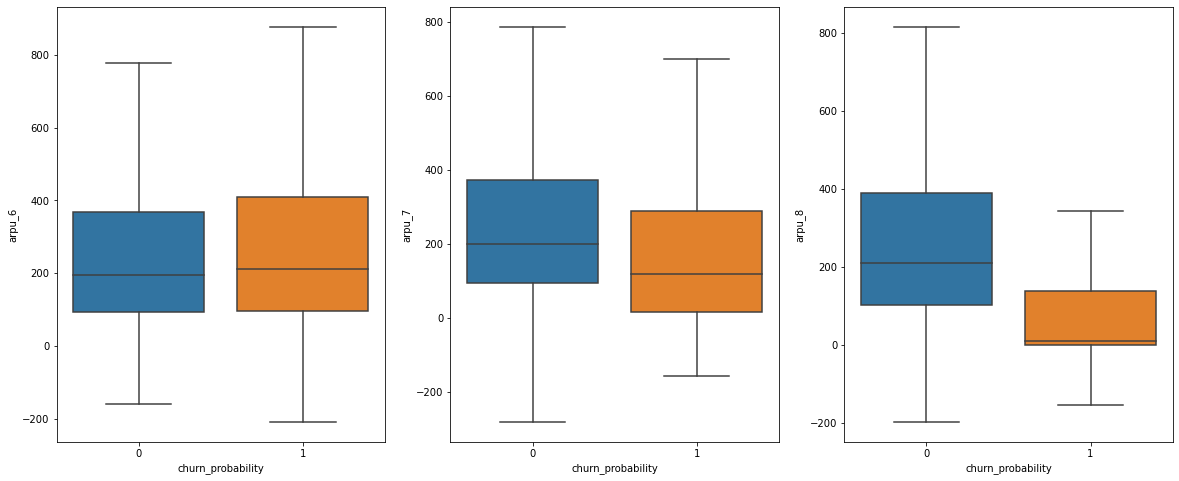

In [48]:
# showfliers attribute below is to suppress printing outliers
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.boxplot(y=train_final['arpu_6'], x=train_final.churn_probability, showfliers=False)
plt.subplot(132)
sns.boxplot(y=train_final['arpu_7'], x=train_final.churn_probability, showfliers=False)
plt.subplot(133)
sns.boxplot(y=train_final['arpu_8'], x=train_final.churn_probability, showfliers=False)

#### plotting onnet again churn_probablility

<AxesSubplot:xlabel='churn_probability', ylabel='onnet_mou_8'>

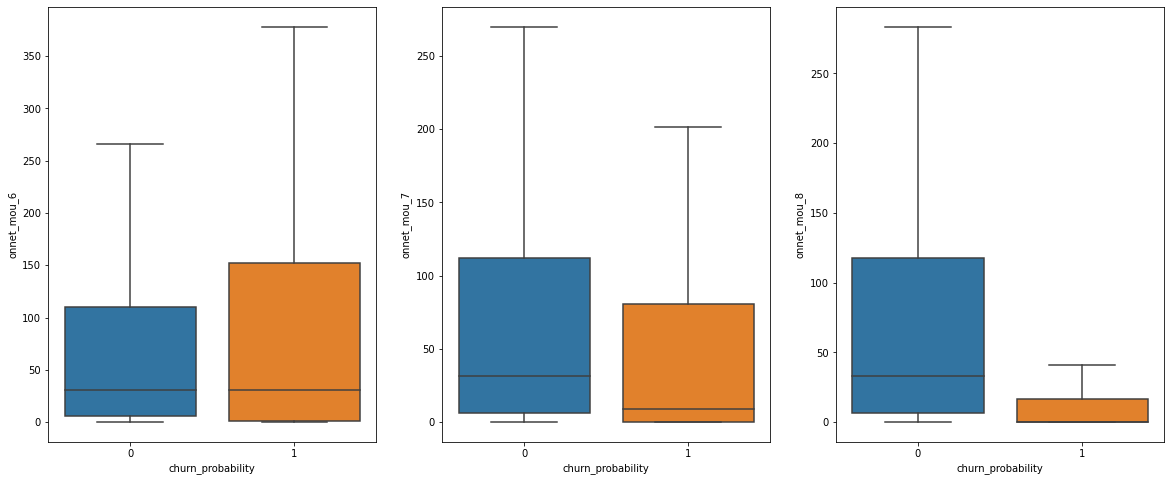

In [49]:
# showfliers attribute below is to suppress printing outliers
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.boxplot(y=train_final['onnet_mou_6'], x=train_final.churn_probability, showfliers=False)
plt.subplot(132)
sns.boxplot(y=train_final['onnet_mou_7'], x=train_final.churn_probability, showfliers=False)
plt.subplot(133)
sns.boxplot(y=train_final['onnet_mou_8'], x=train_final.churn_probability, showfliers=False)

#### from the above two plots, we can see that 
1. churned customers have slightly higher average revenue per user in the 6th month, however it is opposite for 7th and 8th month.
2. also churned customers have slightly higher number of calls within the same operator in the 6th month and it's the opposite for 7th and 8th month.

#### There maybe some correlated varibles that we need to drop here since we can see in the data set there are individual quantities as well as total quantities. let's plot a heatmap for this. 

In [50]:
train_final.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 129 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    id                       69999 non-null  int64  
 1    arpu_6                   69999 non-null  float64
 2    arpu_7                   69999 non-null  float64
 3    arpu_8                   69999 non-null  float64
 4    onnet_mou_6              69999 non-null  float64
 5    onnet_mou_7              69999 non-null  float64
 6    onnet_mou_8              69999 non-null  float64
 7    offnet_mou_6             69999 non-null  float64
 8    offnet_mou_7             69999 non-null  float64
 9    offnet_mou_8             69999 non-null  float64
 10   roam_ic_mou_6            69999 non-null  float64
 11   roam_ic_mou_7            69999 non-null  float64
 12   roam_ic_mou_8            69999 non-null  float64
 13   roam_og_mou_6            69999 non-null  float64
 14   roam

#### we can see here that there are columns such as total_og_mou_6 etc. Let's plot correlation for outgoing calls variable

In [51]:
train_final.columns[train_final.columns.str.contains('og')]

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'],
      dtype='object')

In [52]:
# store these columns in list
og_cols = list(train_final.columns[train_final.columns.str.contains('og_mou')])
og_cols

['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

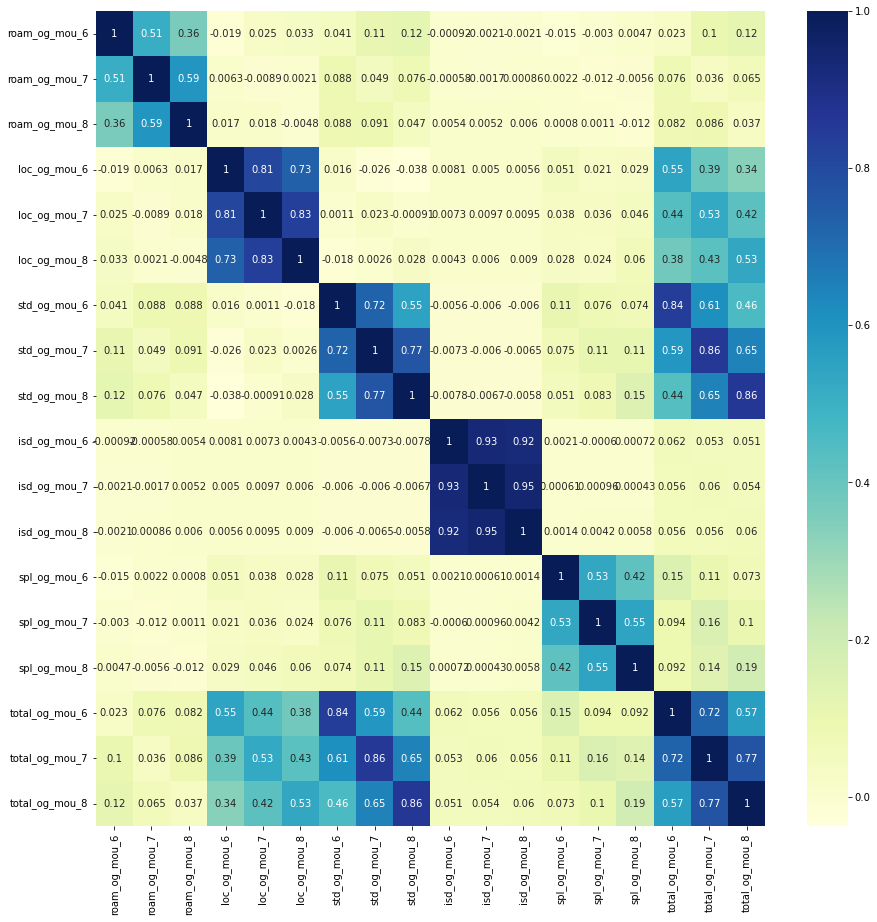

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(train_final[og_cols].corr(), cmap='YlGnBu', annot=True)
plt.show()

In [54]:
# we can safely drop all the columns which are total of some features, since they will be correlated to those features

tot_cols = list(train_final.columns[train_final.columns.str.contains('total')])
tot_cols

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [55]:
# dropping above columns from train and test set

train_final.drop(tot_cols, axis=1, inplace=True)
test_final.drop(tot_cols, axis=1, inplace=True)

train_final.shape, test_final.shape

((69999, 117), (30000, 116))

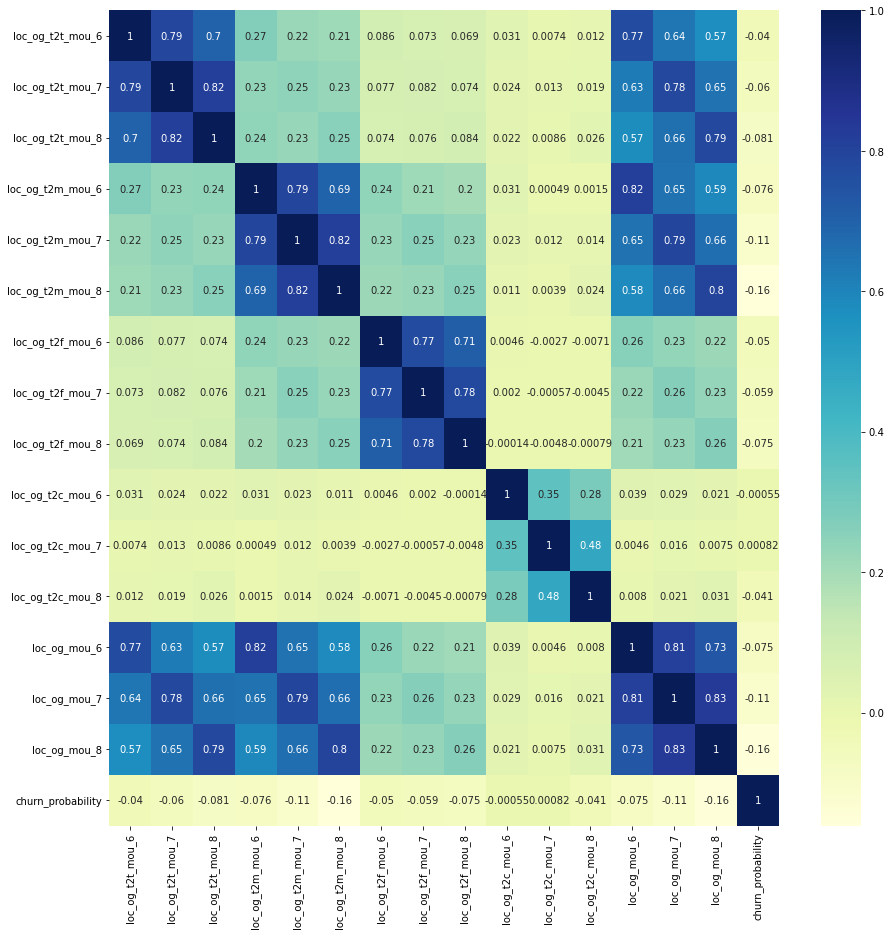

In [56]:
# let us see how local outgoing calls are related to churn probability

# first extract loc_og calls into a list
loc_og_calls = list(train_final.columns[train_final.columns.str.contains('loc_og')])

# add the churn_probability varibale to above list
loc_og_calls.append('churn_probability')

# plotting a heatmap for the same
plt.figure(figsize=(15,15))
sns.heatmap(train_final[loc_og_calls].corr(), cmap='YlGnBu', annot=True)
plt.show()

#### all the local outgoing related features show little relation to the churn, let's test the same with rch_amt(recharge amount variable)

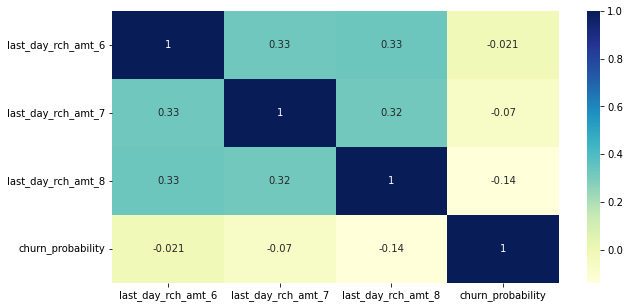

In [57]:
# first extract rch_amt calls into a list
rch_amt = list(train_final.columns[train_final.columns.str.contains('rch_amt')])

# add the churn_probability varibale to above list
rch_amt.append('churn_probability')

# plotting a heatmap for the same
plt.figure(figsize=(10,5))
sns.heatmap(train_final[rch_amt].corr(), cmap='YlGnBu', annot=True)
plt.show()

#### again we see not much of a correlation with respect to churn, let's try it with volume of usage

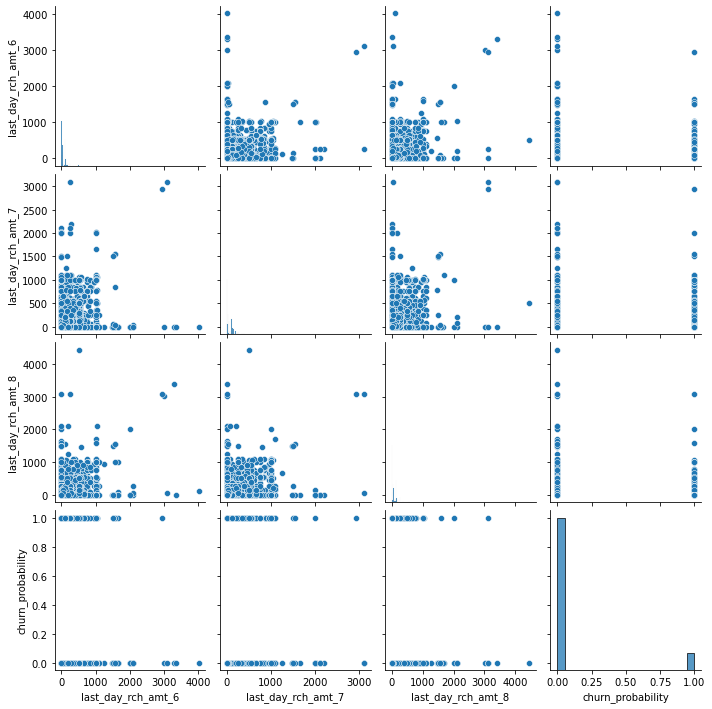

In [58]:
# let us see a paiplot of how these variables are related to one another

sns.pairplot(train_final[rch_amt])
plt.show()

#### we can see that rch_amt for month of july and august are fairly correlated, but it's not too strong

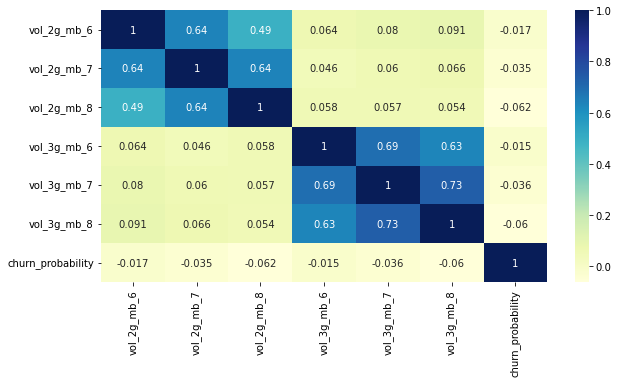

In [59]:
# first extract vol related calls into a list
vol = list(train_final.columns[train_final.columns.str.contains('vol')])

# add the churn_probability varibale to above list
vol.append('churn_probability')

# plotting a heatmap for the same
plt.figure(figsize=(10,5))
sns.heatmap(train_final[vol].corr(), cmap='YlGnBu', annot=True)
plt.show()

#### although single variables are not correlated much to churn_probability, pairs of variables might be.

In [60]:
train_final.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,22.0,10.0,24.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,12.0,10.0,26.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,11.0,22.0,24.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0.0,0.0,0.0,0,15.0,21.0,25.0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0

In [61]:
# let us look at some high value customers who have done atleast 50 rs of recharge in june, july or august

train_final[(train_final.max_rech_amt_6>49) | (train_final.max_rech_amt_7>49) | (train_final.max_rech_amt_8>49)]

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,7.46,27.58,15.18,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,65,65,10,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,0,22.0,10.0,24.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0,145,50,0,0,0,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,0,12.0,10.0,26.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,29.91,2.48,6.38,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,70,70,0,70,50,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,0,11.0,22.0,24.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,16.16,37.99,4.60,0.00,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.00,8.89,0.28,2.81,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,110,110,50,110,110,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,982,0.00,0.00,0.00,0,15.0,21.0,25.0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,

In [62]:
# let us see how many are there
train_final[(train_final.max_rech_amt_6>49) | (train_final.max_rech_amt_7>49) | (train_final.max_rech_amt_8>49)].shape

(60825, 117)

#### Note we are not dropping any low value customers here as we can make use of that information to not to send offers to low value customers

### Step4: data preparation

In [63]:
train_final.shape, test_final.shape

((69999, 117), (30000, 116))

In [64]:
# both train and test data sets contain id columns which we won't be needing for the analysis, let's drop it.

train_df = train_final.drop(['id'],axis=1)
test_df = test_final.drop(['id'], axis=1)

train_df.shape, test_df.shape

((69999, 116), (30000, 115))

In [65]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 116 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    arpu_6                   69999 non-null  float64
 1    arpu_7                   69999 non-null  float64
 2    arpu_8                   69999 non-null  float64
 3    onnet_mou_6              69999 non-null  float64
 4    onnet_mou_7              69999 non-null  float64
 5    onnet_mou_8              69999 non-null  float64
 6    offnet_mou_6             69999 non-null  float64
 7    offnet_mou_7             69999 non-null  float64
 8    offnet_mou_8             69999 non-null  float64
 9    roam_ic_mou_6            69999 non-null  float64
 10   roam_ic_mou_7            69999 non-null  float64
 11   roam_ic_mou_8            69999 non-null  float64
 12   roam_og_mou_6            69999 non-null  float64
 13   roam_og_mou_7            69999 non-null  float64
 14   roam

In [66]:
# let us extract the churn probability into a y variable since we won't be scaling it.
y_train = train_df['churn_probability']
X_train = train_df.drop(['churn_probability'], axis=1)

X_train.shape, y_train.shape

((69999, 115), (69999,))

In [67]:
# let us scale the data using a standard scaler. we need not create dummy variables since all the columns are numeric

# import standard scalre from sklearn

from sklearn.preprocessing import StandardScaler

In [68]:
# scaling train and test data

scaler = StandardScaler()

X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
test_df[list(test_df.columns)] = scaler.transform(test_df[list(test_df.columns)])

In [69]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
count,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04,6.999900e+04
mean,-1.064957e-17,-7.899508e-17,1.482129e-16,-1.515809e-16,4.452748e-16,3.495064e-16,3.661806e-16,-3.460630e-16,3.978462e-17,-1.367764e-15,1.281098e-15,5.434580e-15,1.186177e-15,5.035940e-16,1.300131e-15,-9.519268e-17,-2.834487e-16,-2.147932e-16,-1.590608e-16,-4.675977e-16,-4.397371e-16,-1.697091e-15,-1.498033e-15,6.544414e-16,-1.009187e-15,-3.499727e-16,1.482682e-15,2.934171e-16,1.667515e-16,-2.637547e-16,5.950849e-16,3.817858e-16,-1.523931e-15,4.011914e-15,2.339988e-15,2.531844e-16,-2.429253e-15,2.761208e-15,-7.700268e-16,2.920468e-16,1.729578e-16,-2.376181e-16,4.470961e-16,-1.701462e-15,8.353799e-16,1.951895e-16,-1.552762e-15,-1.944108e-16,-1.300337e-15,-8.084108e-16,2.427283e-15,3.641671e-16,-8.365428e-16,-8.038518e-16,9.867962e-17,-6.953347e-17,5.593146e-17,3.658229e-16,-9.424858e-17,-1.173952e-15,-2.873029e-16,4.672218e

In [70]:
test_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.001466,0.003395,0.002803,-0.007958,-0.002637,-0.000867,-0.009245,-0.001510,-0.001501,0.010605,0.007814,0.017079,-0.012113,-0.001426,0.009575,0.004414,0.006256,0.003349,0.002417,0.012209,0.011521,0.002084,0.003644,0.003215,-0.001573,0.002955,0.005769,0.004296,0.011741,0.009444,-0.009907,-0.006042,-0.003225,-0.010662,-0.009189,-0.009966,0.001139,0.012054,0.003817,-0.013358,-0.009684,-0.008562,-0.005199,-0.003881,-0.005611,-0.008459,0.000064,0.000740,-0.005714,0.011053,0.000410,-0.002604,0.002155,-0.002035,0.006591,0.011915,0.003957,0.002962,0.002503,0.002025,0.003412,0.009405,0.001804,0.006367,0.007932,-0.002120,-0.000361,-0.001254,0.002959,0.002078,0.003447,0.001612,0.003198,0.003426,0.001399,-0.007195,0.004923,-0.001478,0.003632,0.008323,0.004406,0.000201,-0.001714,0.001853,0.001873,0.016968,0.005034,-0.009212,0.003199

In [71]:
# checking the shape of train and test data

X_train.shape, test_df.shape

((69999, 115), (30000, 115))

### Step 5: model training

#### first let us start with vanilla model and let's build a logistic regression model

#### we will use rfe to select the best features

In [72]:
# let us import the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [73]:
# taking less number of parameters for logistic regression as our aim is to only explain the business outcome. 
# If we take too many features, it becomes difficult to explain
# by intitution picking only 20 variables for rfe.

# specify model
lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=20)             
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 5),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 66),
 ('onnet_mou_7', False, 63),
 ('onnet_mou_8', False, 8),
 ('offnet_mou_6', False, 87),
 ('offnet_mou_7', False, 24),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 36),
 ('roam_ic_mou_7', False, 70),
 ('roam_ic_mou_8', False, 75),
 ('roam_og_mou_6', False, 67),
 ('roam_og_mou_7', False, 22),
 ('roam_og_mou_8', False, 2),
 ('loc_og_t2t_mou_6', False, 64),
 ('loc_og_t2t_mou_7', False, 28),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 45),
 ('loc_og_t2m_mou_7', False, 40),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 34),
 ('loc_og_t2f_mou_7', False, 81),
 ('loc_og_t2f_mou_8', False, 69),
 ('loc_og_t2c_mou_6', False, 61),
 ('loc_og_t2c_mou_7', False, 60),
 ('loc_og_t2c_mou_8', False, 21),
 ('loc_og_mou_6', False, 80),
 ('loc_og_mou_7', False, 27),
 ('loc_og_mou_8', False, 44),
 ('std_og_t2t_mou_6', False, 65),
 ('std_og_t2t_mou_7', False, 54),
 ('std_og_t

In [75]:
# extract the necessary columns which have importance
col = X_train.columns[rfe.support_]

#### building logistic regression model using stats models api.

In [76]:
# import the statsmodel
import statsmodels.api as sm

In [77]:
# training a logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69978
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14689.
Date:                Sat, 10 Dec 2022   Deviance:                       29378.
Time:                        12:52:32   Pearson chi2:                 1.88e+08
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2124
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1292      0.045    -91.842      0.000      -4.217      -4.041
arpu_6                      0.3900      0.020     19.372      0.000       0.351       0.429
arpu_8                     -0.2046      0.030     -6.751      0.000      -0.264      -0.145
loc_og_t2t_mou_8           -0.1638      0.056     -2.933      0.003      -0.273      -0.054
loc_og_t2m_mou_8           -0.5069      0.070     -7.267      0.000      -0.644      -0.370
spl_og_mou_8               -0.2382      0.040     -6.029      0.000      -0.316      -0.161
og_others_8                -1.6675      0.995     -1.675      0.094      -3.618       0.283
loc_ic_t2t_mou_8         1.452e+04    452.807     32.063      0.000    1.36e+04    1.54e+04
loc_ic_t2m_mou_8         1.722e+04    537.216     32.061      0.000    1.62e+04    1.83e+04
loc_ic_t2f_mou_8         3966.0901    123.708     32.060      0.000    3723.628    4208.553
loc_ic_mou_7                0.5597      0.039     14.519      0.000       0.484       0.635
loc_ic_mou_8            -2.585e+04    806.196    -32.066      0.000   -2.74e+04   -2.43e+04
std_ic_t2f_mou_8           -0.3794      0.097     -3.897      0.000      -0.570      -0.189
std_ic_mou_8               -0.2723      0.045     -6.108      0.000      -0.360      -0.185
spl_ic_mou_8               -1.0008      0.061    -16.283      0.000      -1.121      -0.880
last_day_rch_amt_8         -0.5063      0.032    -15.907      0.000      -0.569      -0.444
monthly_2g_8               -0.3557      0.033    -10.820      0.000      -0.420      -0.291
sachet_2g_8                -0.3878      0.036    -10.833      0.000      -0.458      -0.318
aon                        -0.3110      0.020    -15.606      0.000      -0.350      -0.272
aug_vbc_3g                 -0.1875      0.034     -5.541      0.000      -0.254      -0.121
date_of_last_rech_8_day    -0.4106      0.012    -33.120      0.000      -0.435      -0.386
===========================================================================================
"""

#### here all the variables have p value of less than 0.05 expect og_others_8, let's drop it.

In [81]:
col = list(col)
col.remove('og_others_8')
col

['arpu_6',
 'arpu_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'aon',
 'aug_vbc_3g',
 'date_of_last_rech_8_day']

In [82]:
# training a logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69979
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14693.
Date:                Sat, 10 Dec 2022   Deviance:                       29387.
Time:                        12:54:55   Pearson chi2:                 1.91e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2123
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1080      0.043    -95.913      0.000      -4.192      -4.024
arpu_6                      0.3873      0.020     19.304      0.000       0.348       0.427
arpu_8                     -0.2060      0.030     -6.809      0.000      -0.265      -0.147
loc_og_t2t_mou_8           -0.1638      0.056     -2.934      0.003      -0.273      -0.054
loc_og_t2m_mou_8           -0.5066      0.070     -7.260      0.000      -0.643      -0.370
spl_og_mou_8               -0.2402      0.040     -6.076      0.000      -0.318      -0.163
loc_ic_t2t_mou_8         1.452e+04    452.751     32.068      0.000    1.36e+04    1.54e+04
loc_ic_t2m_mou_8         1.722e+04    537.151     32.066      0.000    1.62e+04    1.83e+04
loc_ic_t2f_mou_8         3966.1790    123.692     32.065      0.000    3723.746    4208.612
loc_ic_mou_7                0.5602      0.039     14.534      0.000       0.485       0.636
loc_ic_mou_8            -2.585e+04    806.097    -32.070      0.000   -2.74e+04   -2.43e+04
std_ic_t2f_mou_8           -0.3791      0.097     -3.895      0.000      -0.570      -0.188
std_ic_mou_8               -0.2724      0.045     -6.109      0.000      -0.360      -0.185
spl_ic_mou_8               -1.0009      0.061    -16.289      0.000      -1.121      -0.880
last_day_rch_amt_8         -0.5068      0.032    -15.913      0.000      -0.569      -0.444
monthly_2g_8               -0.3555      0.033    -10.813      0.000      -0.420      -0.291
sachet_2g_8                -0.3879      0.036    -10.843      0.000      -0.458      -0.318
aon                        -0.3117      0.020    -15.646      0.000      -0.351      -0.273
aug_vbc_3g                 -0.1864      0.034     -5.512      0.000      -0.253      -0.120
date_of_last_rech_8_day    -0.4105      0.012    -33.126      0.000      -0.435      -0.386
===========================================================================================
"""

#### now all attributes have p value less than 0.05

In [83]:
# importing metric evaluation packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.001037
1    0.077719
2    0.126151
3    0.042875
4    0.009045
5    0.015324
6    0.031599
7    0.011783
8    0.178148
9    0.006427
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00103656, 0.0777188 , 0.12615137, 0.04287543, 0.0090446 ,
       0.01532376, 0.03159851, 0.01178287, 0.17814776, 0.00642725])

In [86]:
# constructing data frame so that we can analyse accuracy and other relevant metrics
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.001037,0
1,0,0.077719,1
2,0,0.126151,2
3,0,0.042875,3
4,0,0.009045,4


In [87]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.001037,0,0
1,0,0.077719,1,0
2,0,0.126151,2,0
3,0,0.042875,3,0
4,0,0.009045,4,0


In [88]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9194988499835712


#### train accuracy is pretty high, however our aim here is to increase sensitivity to identify potential churn customers.

In [89]:
# Let's take a look at the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[61919,   948],
       [ 4687,  2445]], dtype=int64)

#### let us look at other metrics

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3428210880538418

#### sensitivity is pretty low, let us adjust our threshold

#### let us plot the roc curve to analyze more

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

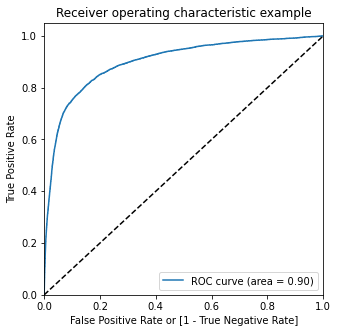

In [94]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### The curve is decent in our case, let us find the optimal cutoff point

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001037,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.077719,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.126151,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.042875,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.009045,4,0,1,0,0,0,0,0,0,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101887  1.000000  0.000000
0.1   0.1  0.805040  0.850953  0.799831
0.2   0.2  0.880955  0.759534  0.894730
0.3   0.3  0.914042  0.668817  0.941861
0.4   0.4  0.922870  0.496775  0.971209
0.5   0.5  0.919499  0.342821  0.984921
0.6   0.6  0.916370  0.248598  0.992126
0.7   0.7  0.910399  0.152692  0.996357
0.8   0.8  0.901499  0.039540  0.999284
0.9   0.9  0.899041  0.010516  0.999841


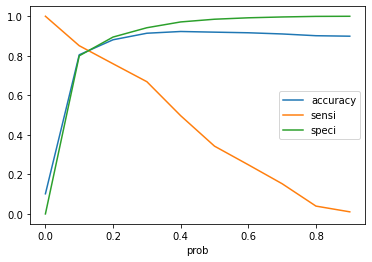

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### from above optimal cutoff point is around 0.15

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001037,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.077719,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.126151,2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.042875,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.009045,4,0,1,0,0,0,0,0,0,0,0,0,0


In [99]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8526264660923728

In [100]:
confusion2 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[53991,  8876],
       [ 1440,  5692]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7980931015143017

#### sensitivity has greatly increased from previous cutoff

### Step6: drawing insights

In [103]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69979
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14693.
Date:                Sat, 10 Dec 2022   Deviance:                       29387.
Time:                        12:56:14   Pearson chi2:                 1.91e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2123
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1080      0.043    -95.913      0.000      -4.192      -4.024
arpu_6                      0.3873      0.020     19.304      0.000       0.348       0.427
arpu_8                     -0.2060      0.030     -6.809      0.000      -0.265      -0.147
loc_og_t2t_mou_8           -0.1638      0.056     -2.934      0.003      -0.273      -0.054
loc_og_t2m_mou_8           -0.5066      0.070     -7.260      0.000      -0.643      -0.370
spl_og_mou_8               -0.2402      0.040     -6.076      0.000      -0.318      -0.163
loc_ic_t2t_mou_8         1.452e+04    452.751     32.068      0.000    1.36e+04    1.54e+04
loc_ic_t2m_mou_8         1.722e+04    537.151     32.066      0.000    1.62e+04    1.83e+04
loc_ic_t2f_mou_8         3966.1790    123.692     32.065      0.000    3723.746    4208.612
loc_ic_mou_7                0.5602      0.039     14.534      0.000       0.485       0.636
loc_ic_mou_8            -2.585e+04    806.097    -32.070      0.000   -2.74e+04   -2.43e+04
std_ic_t2f_mou_8           -0.3791      0.097     -3.895      0.000      -0.570      -0.188
std_ic_mou_8               -0.2724      0.045     -6.109      0.000      -0.360      -0.185
spl_ic_mou_8               -1.0009      0.061    -16.289      0.000      -1.121      -0.880
last_day_rch_amt_8         -0.5068      0.032    -15.913      0.000      -0.569      -0.444
monthly_2g_8               -0.3555      0.033    -10.813      0.000      -0.420      -0.291
sachet_2g_8                -0.3879      0.036    -10.843      0.000      -0.458      -0.318
aon                        -0.3117      0.020    -15.646      0.000      -0.351      -0.273
aug_vbc_3g                 -0.1864      0.034     -5.512      0.000      -0.253      -0.120
date_of_last_rech_8_day    -0.4105      0.012    -33.126      0.000      -0.435      -0.386
===========================================================================================
"""

#### conclusions
1. As Age on network i.e number of days the customer is using the operator increases, customers are less likely to churn, because such customers get accoustomed to the network and packages, and hence become loyal customers. 
2. As outgoing calls from either local or std modes increases customers, customers are less likely to churn. They seem to be happy with current plan.
3. However on the other hand as the number incoming calls increases, customers are more likely to churn, probably because such cutomers don't make too many calls rather receive calls and have made up their mind to churn.(loc_ic_t2f_mou_8, loc_ic_mou_7, loc_ic_t2t_mou_8). Also they might receive more calls in the 8th month as they are in constant communication with operators for churn.
4. customers who use Service schemes with validity smaller than a month and use 2g are less likely to churn becuase they might not use the telecom services much and recharge only when needed.

#### some important variables
1. loc_ic_t2f_mou_8
2. aon
3. loc_og_t2m_mou_8
4. sachet_2g_8

### Step7: building other models

#### but before we do that let us apply PCA to our current data set, so that we reduce the number of features required for modelling

In [104]:
# import PCA from sklearn
from sklearn.decomposition import PCA

In [105]:
# instantiate a PCA object
pca = PCA(random_state=42)

In [106]:
X_train.shape

(69999, 115)

In [107]:
# fit the train data on PCA
pca.fit(X_train)

PCA(random_state=42)

In [108]:
# let us see the components of pca
pca.components_

array([[ 1.99263093e-01,  2.11239316e-01,  1.99855009e-01, ...,
         7.58812616e-02,  6.90345505e-02,  4.99880028e-02],
       [ 6.76020045e-02,  8.49401865e-02,  7.40719560e-02, ...,
         4.25515290e-02,  4.50105892e-02,  5.23223234e-02],
       [ 8.01769342e-02,  9.33081944e-02,  9.25637284e-02, ...,
        -2.21093852e-02, -1.53453605e-02, -6.83249700e-03],
       ...,
       [ 5.18607740e-07,  5.17483326e-08,  9.53600997e-09, ...,
         5.65076157e-07,  3.01395666e-07,  4.75260026e-07],
       [-6.24524349e-07,  1.62570765e-07,  4.84989658e-07, ...,
        -2.59033435e-07,  2.26110546e-07,  2.74318121e-07],
       [ 2.92923987e-08, -6.10418652e-07,  4.73828289e-07, ...,
        -1.14896954e-07, -6.63052411e-08,  1.38421984e-07]])

In [109]:
# Looking at the explained variance ratio for each component

pca.explained_variance_ratio_

array([1.06906968e-01, 6.87725811e-02, 5.24310741e-02, 4.46924757e-02,
       3.59957320e-02, 3.29308913e-02, 2.85389972e-02, 2.81981876e-02,
       2.64211116e-02, 2.58422953e-02, 2.40616755e-02, 2.39558619e-02,
       2.23242961e-02, 2.17240547e-02, 1.87723218e-02, 1.84385669e-02,
       1.76782417e-02, 1.53356354e-02, 1.52291260e-02, 1.47270410e-02,
       1.46197804e-02, 1.36850635e-02, 1.35900294e-02, 1.25167676e-02,
       1.06360665e-02, 1.04936085e-02, 1.00439736e-02, 9.60805678e-03,
       9.21755350e-03, 8.63585830e-03, 8.42673394e-03, 8.15683543e-03,
       8.12426240e-03, 7.77313788e-03, 7.50857724e-03, 7.42278182e-03,
       7.14814234e-03, 6.96835210e-03, 6.71965916e-03, 6.63217895e-03,
       6.23540545e-03, 6.11649019e-03, 5.78356138e-03, 5.77233848e-03,
       5.43612159e-03, 5.35193523e-03, 4.94947174e-03, 4.90339839e-03,
       4.64091012e-03, 4.48378187e-03, 4.42754870e-03, 4.32248167e-03,
       4.24992790e-03, 4.04850418e-03, 4.04094941e-03, 3.86501056e-03,
      

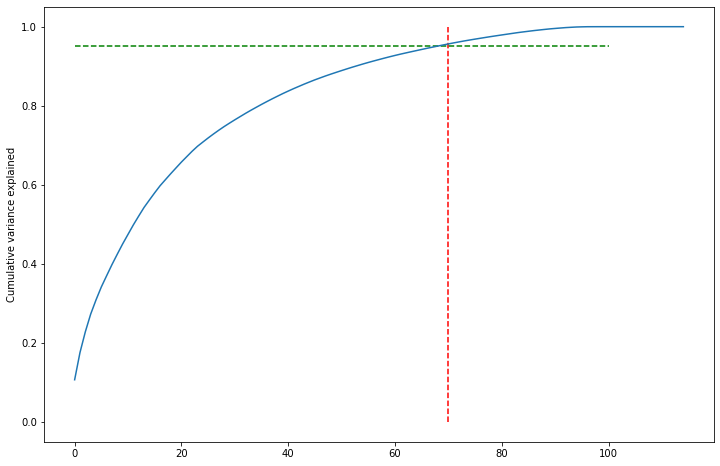

In [110]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### we can see that nearly 95 percent of variance is explained by 70 principal components

#### let us perform PCA with 70 components

In [111]:
# import incremental PCA
from sklearn.decomposition import IncrementalPCA

In [112]:
# instantiating an object
pca_final = IncrementalPCA(n_components=70)

In [113]:
X_train.shape

(69999, 115)

In [114]:
# fit and transform to obtain transformed data set having only 70 components
df_train_pca = pca_final.fit_transform(X_train)

In [115]:
df_train_pca.shape

(69999, 70)

In [116]:
# let us transform the test data as well

df_test_pca = pca_final.transform(test_df)
df_test_pca.shape

(30000, 70)

In [117]:
# let us apply a vanilla logistic regression model for PCA

logreg = LogisticRegression()
logreg.fit(df_train_pca, y_train)

LogisticRegression()

In [118]:
# making predictions to see the evaluation metrics
y_train_pred = logreg.predict(df_train_pca)

accuracy_score(y_train, y_train_pred)

0.9175131073301047

In [119]:
# let us get submission file for this vanilla model

y_test_pred = logreg.predict(df_test_pca)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
# write the data in required form to a data fram for submission
solution = pd.DataFrame({'id': test['id'], 'churn_probability':y_test_pred})

In [121]:
solution.to_csv('solution_pca_logreg.csv', index=False)

### Let us now start building other models on top of this transformed data

#### let us start with random forest

In [122]:
# importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

In [123]:
# let us tune the hyper parameters for random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [124]:
# let us see the best accuracy so far
grid_search.best_score_

0.9163130946258153

In [125]:
# extracting best estimator in a variable
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

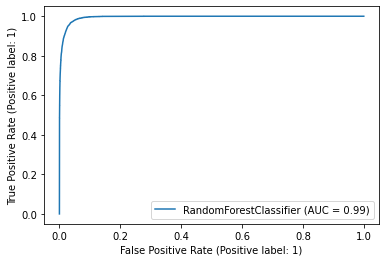

In [126]:
# let us plot the roc curve for this
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [143]:
# let us check accuracy score for train data

y_train_pred = rf_best.predict(df_train_pca)
accuracy_score(y_train, y_train_pred)

0.9626280375433934

In [144]:
recall_score(y_train, y_train_pred)

0.6468031407739765

#### The above curve has auc nearly 0.99 which is a good indication

In [128]:
# let us get submission file for this random forest model

y_test_pred = rf_best.predict(df_test_pca)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
# write the data in required form to a data fram for submission
solution = pd.DataFrame({'id': test['id'], 'churn_probability':y_test_pred})

In [131]:
solution.to_csv('solution_pca_random_forest.csv', index=False)

# XGBoost nearly ran for 5 hours on my machine, run at your own risk😅.

### Let us now try using XGBoost for the same

In [132]:
# let us use RandomizedSearchCV for XGBoost since GridSearchCV will take a lot of time
from sklearn.model_selection import RandomizedSearchCV

In [133]:
# importing xgboost
import xgboost as xgb

In [134]:
# instantiating an object
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [135]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200], # no of trees 
        'learning_rate' : [0.02, 0.05, 0.1],  # eta
        'min_child_weight': [7, 10],
        'gamma': [0.5, 1, 1.5],
        'max_depth': [3, 4, 5]
        }

folds = 4

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=4, verbose=3, random_state=42)

In [136]:
# fitting randomized search
random_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [137]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

 Best accuracy for 4-fold search with 800 parameter combinations:
0.9244275354510054

 Best hyperparameters:
{'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5}


In [138]:
# extracting best estimator
xg_best = random_search.best_estimator_

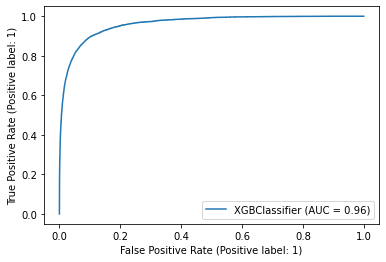

In [139]:
# plotting the ROC curve

plot_roc_curve(xg_best, df_train_pca, y_train)
plt.show()

#### This is a good roc curve however we got better auc of around 0.99 for random forest with PCA

In [145]:
# checking the accuracy score
y_train_pred = xg_best.predict(df_train_pca)
accuracy_score(y_train, y_train_pred)

0.9481135444792068

In [146]:
recall_score(y_train, y_train_pred)

0.607543466068424

In [141]:
# let us extract the solution.csv file for submission
y_test_pred = xg_best.predict(df_test_pca)
y_test_pred

solution = pd.DataFrame({'id': test['id'], 'churn_probability':y_test_pred})

solution.to_csv('solution_pca_xgboost.csv', index=False)

#### grid search best score is greater for XGBoost . But XGBoost takes a lot of time, so if time is a constraint we can go with random forest as difference in accuracy is small, else with XGBoost. however if we want greater sensitivity we can go with random forest or tuned logistic regression model that offers higher sensitivity.

# Thank You